In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import fnmatch
import datetime

import os
import pandas as pd


In [2]:
dd ='20210802'
cnms = 'CNMSshvol'+dd+'.txt'
bdir =  '/home/pookie/data/shortdata2/'


In [3]:
f = bdir +cnms
df = pd.read_csv(f,sep="|")

df

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
0,20210802,A,130596.0,0.0,345042.0,"B,Q,N"
1,20210802,AA,1054896.0,5156.0,2953021.0,"B,Q,N"
2,20210802,AAAU,27615.0,0.0,45049.0,"Q,N"
3,20210802,AAC,335.0,0.0,1709.0,Q
4,20210802,AAC/U,500.0,0.0,11515.0,Q
...,...,...,...,...,...,...
9869,20210802,ZY,38638.0,0.0,59221.0,"B,Q,N"
9870,20210802,ZYME,33450.0,1456.0,184884.0,"B,Q,N"
9871,20210802,ZYNE,40336.0,0.0,242801.0,"B,Q,N"
9872,20210802,ZYXI,97474.0,1990.0,209822.0,"B,Q,N"


In [11]:
sev = df['ShortExemptVolume']
tv = df['TotalVolume']
sv = df['ShortVolume']
df2 =df
df2['PercentShort']=sv/tv*100
#df2['PercentShort']=sev/tv
df2 = df2.dropna()
df2

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market,PercentShort
0,20210802,A,130596.0,0.0,345042.0,"B,Q,N",37.849305
1,20210802,AA,1054896.0,5156.0,2953021.0,"B,Q,N",35.722604
2,20210802,AAAU,27615.0,0.0,45049.0,"Q,N",61.299918
3,20210802,AAC,335.0,0.0,1709.0,Q,19.602106
4,20210802,AAC/U,500.0,0.0,11515.0,Q,4.342162
...,...,...,...,...,...,...,...
9868,20210802,ZWRKW,1106.0,0.0,1112.0,"B,Q,N",99.460432
9869,20210802,ZY,38638.0,0.0,59221.0,"B,Q,N",65.243748
9870,20210802,ZYME,33450.0,1456.0,184884.0,"B,Q,N",18.092426
9871,20210802,ZYNE,40336.0,0.0,242801.0,"B,Q,N",16.612782


In [12]:
GME = df2[df2['Symbol']==('GME')]
GME

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market,PercentShort
3849,20210802,GME,623709.0,6353.0,1155891.0,"B,Q,N",53.959154


Text(0.5, 1.0, 'Histogram Short Percentages for the Day 20210802 across market')

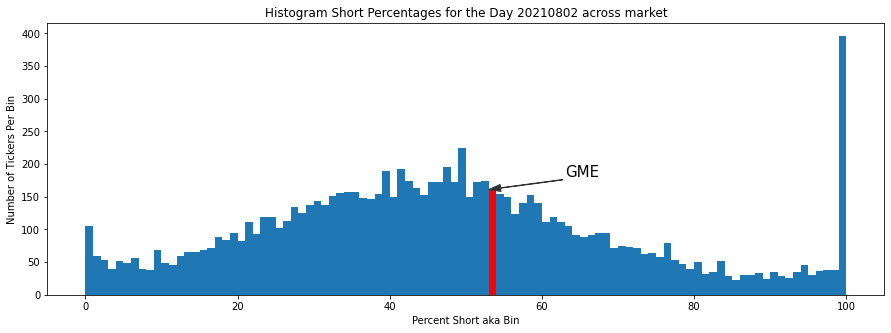

In [13]:
plt.figure(figsize=(15,5))
per = df2['PercentShort']
n, bins, patches = plt.hist(per, bins=100);
xx = int(GME['PercentShort'])
nn = n[xx]
patches[xx].set_fc('r')

# Add annotation
plt.annotate('GME', xy=(xx, nn), xytext=(xx+10, nn+20), 
             fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
plt.ylabel('Number of Tickers Per Bin')
plt.xlabel('Percent Short aka Bin')
plt.title('Histogram Short Percentages for the Day {} across market'.format(dd))

In [14]:
n[50]

150.0

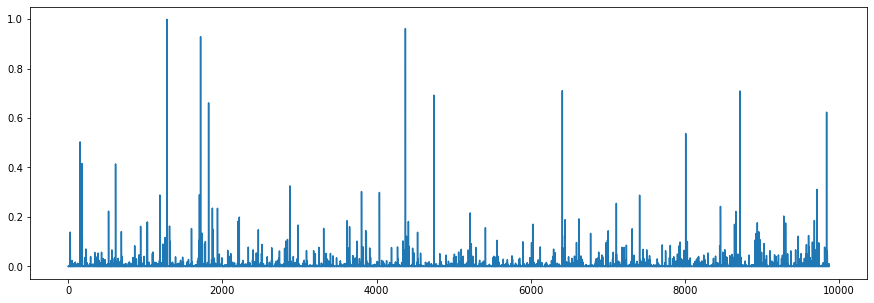

In [8]:
plt.figure(figsize=(15,5))
plt.plot(per)

In [9]:
mask = df['PercentShort']>70
df_highshort = df[mask]
mask = df_highshort['TotalVolume']>1000000
df_x = df_highshort[mask]
df_x.sort_values(by=['PercentShort'], ascending=False)

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market,PercentShort
